# 숫자 손글씨 분류하기
MNIST
---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("data/digit.csv")

df.head()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [3]:
from sklearn.model_selection import train_test_split

train_data = df.drop(["label"],axis=1)
target_data = df["label"]

In [4]:
train_data.describe()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,19","pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28"
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001003,0.000480,0.000239,0.000050,0.000025,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027722,0.017804,0.013588,0.003535,0.002500,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988281,0.988281,0.988281,0.250000,0.250000,0.0,0.0,0.0,0.0,0.0


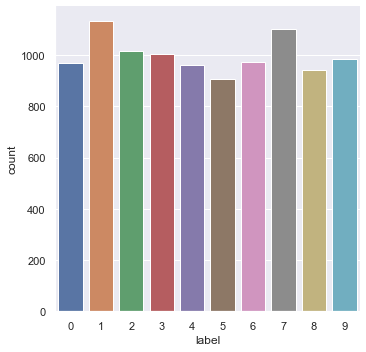

In [5]:
sns.catplot(data=df,x="label",kind="count")

In [6]:
# 데이터셋 구성
x_train,x_test,y_train,y_test = train_test_split(train_data,target_data, test_size =0.2)

In [7]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

print("training set accuracy: ",tree.score(x_train,y_train))
print("test set accuracy: ",tree.score(x_test,y_test))

prediction_by_tree = tree.predict(x_test)
prediction_by_tree

training set accuracy:  1.0
test set accuracy:  0.8045


array([8, 3, 5, ..., 7, 7, 1], dtype=int64)

In [8]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(x_train,y_train)

print("training set accuracy: ",forest.score(x_train,y_train))
print("test set accuracy: ",forest.score(x_test,y_test))

prediction_by_forest = forest.predict(x_test)
prediction_by_forest

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training set accuracy:  0.999
test set accuracy:  0.905


array([8, 5, 4, ..., 7, 7, 1], dtype=int64)

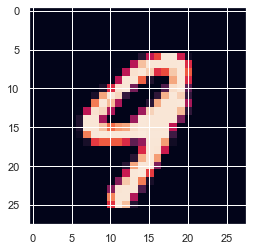

인식된 숫자는  9 입니다.


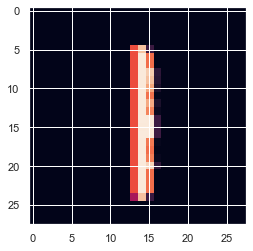

인식된 숫자는  1 입니다.


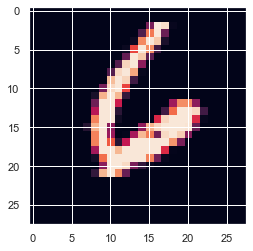

인식된 숫자는  6 입니다.


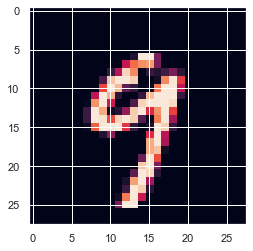

인식된 숫자는  9 입니다.


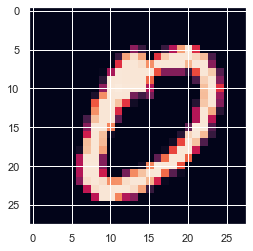

인식된 숫자는  0 입니다.


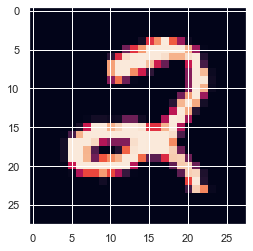

인식된 숫자는  2 입니다.


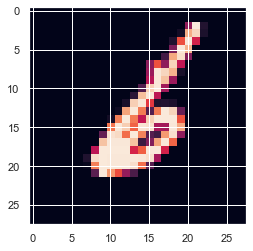

인식된 숫자는  6 입니다.


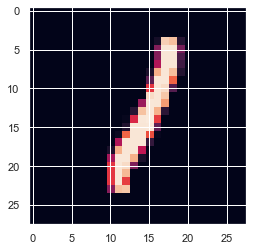

인식된 숫자는  1 입니다.


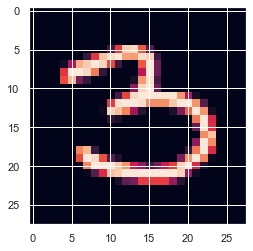

인식된 숫자는  0 입니다.


In [9]:
# random으로 픽하기
import random
for i in range(9):
    n = random.randrange(0,len(x_test))
    
    img = np.reshape(x_test.iloc[n].values,[28,28])
    plt.imshow(img)
    plt.show()
    
    result = forest.predict([x_test.iloc[n].values])[0]
    print("인식된 숫자는 ",result,"입니다.")

## Support Vector Machine

In [10]:
from sklearn.svm import SVC
vector = SVC().fit(x_train,y_train)

print("training set accuracy: ",vector.score(x_train,y_train))
print("test set accuracy: ",vector.score(x_test,y_test))


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


training set accuracy:  0.923875
test set accuracy:  0.912
